<a href="https://colab.research.google.com/github/sreelekshmyanil/DL-Assignments---VIT/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SREELEKSHMY A***

***20MAI0017***

https://github.com/sreelekshmyanil/DL-Assignments---VIT

**AUTOENCODER**

An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore signal “noise”. "Autoencoding" is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. To build an autoencoder, you need three things: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a "loss" function). The encoder and decoder will be chosen to be parametric functions (typically neural networks), and to be differentiable with respect to the distance function, so the parameters of the encoding/decoding functions can be optimize to minimize the reconstruction loss, using Stochastic Gradient Descent. 

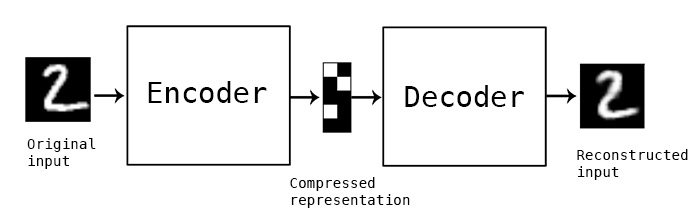

**Implementation of simple autoencoder using Keras**

In [1]:
import keras
from keras import layers
import matplotlib.pyplot as plt

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
#We'll configure our model to use a per-pixel binary crossentropy loss, and the Adam optimizer:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [5]:
#Let's prepare our input data. We're using MNIST digits

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
#We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [8]:
#train our autoencoder for 50 epochs:

history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.3839 - accuracy: 0.0105 - val_loss: 0.1893 - val_accuracy: 0.0092
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1801 - accuracy: 0.0117 - val_loss: 0.1541 - val_accuracy: 0.0097
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1498 - accuracy: 0.0094 - val_loss: 0.1341 - val_accuracy: 0.0087
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1321 - accuracy: 0.0079 - val_loss: 0.1213 - val_accuracy: 0.0098
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1207 - accuracy: 0.0096 - val_loss: 0.1127 - val_accuracy: 0.0101
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1123 - accuracy: 0.0100 - val_loss: 0.1065 - val_accuracy: 0.0104
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1068 - accuracy: 0.0106 - val_loss: 0.1023 - val_accuracy: 0.0120
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


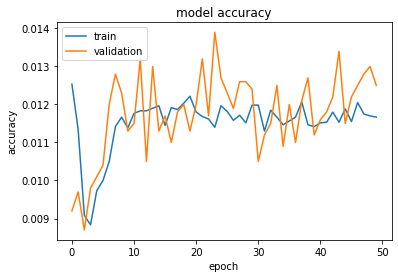

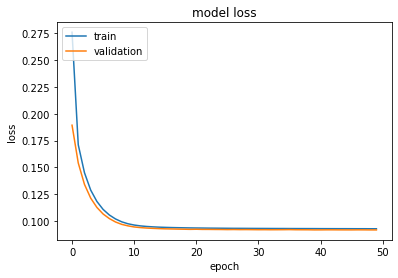

In [9]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [11]:
encoded_imgs

array([[ 2.911647 ,  8.481346 ,  7.5122647, ...,  4.7078605,  6.389453 ,
         4.8443704],
       [ 4.6815867,  9.392703 , 17.492113 , ...,  3.2328806,  9.695251 ,
        13.110238 ],
       [ 5.1074476,  4.7320704,  2.5149736, ...,  0.8793265,  5.784795 ,
         2.0148668],
       ...,
       [12.015841 ,  9.351883 ,  5.8386188, ..., 11.41086  ,  7.3198395,
         9.280625 ],
       [ 8.510903 ,  7.3467517, 14.590208 , ...,  1.4422504, 10.1266165,
         9.963771 ],
       [14.879631 , 14.616822 ,  8.121642 , ...,  8.806161 , 13.211161 ,
        20.23556  ]], dtype=float32)

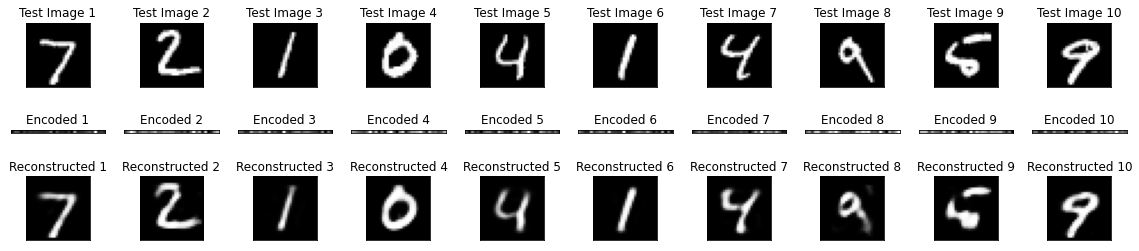

In [12]:
# Use Matplotlib 
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    ax.set_title('Test Image '+ str(i+1))
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Display encoded
    ax = plt.subplot(3, n, i + 1 + n )
    ax.set_title('Encoded '+ str(i+1))
    a = np.expand_dims(encoded_imgs[i], axis=0)  
    plt.imshow(a)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    ax.set_title('Reconstructed '+ str(i+1))
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()